## Individual household electric power consumption
#### https://archive.ics.uci.edu/dataset/484/travel+reviews

In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path


# import matplotlib.pyplot as plt


# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# import seaborn as sns

# from scipy.spatial.distance import cdist


from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, DBSCAN, Birch, OPTICS, AffinityPropagation, AgglomerativeClustering, SpectralClustering


# from sklearn.linear_model import Perceptron 
# from sklearn.preprocessing import StandardScaler 
# from sklearn.metrics import accuracy_score 
# from sklearn.metrics import hamming_loss
# from sklearn.neural_network import MLPClassifier 
# import matplotlib.pyplot as plt 
# from matplotlib.colors import ListedColormap 

# import random

# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.multiclass import OneVsRestClassifier

# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# from sklearn import metrics


print()
Power_consumption = pd.read_csv(f'{Path.cwd()}/household_power_consumption.csv'
            , delimiter=',')


In [3]:
Power_consumption

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


#### The most significant difference between the active and reactive power is that the active power is the actual power which is dissipated in the circuit. Whereas, the reactive power is the useless power which only flows between the source and load. 


In [4]:
Power_consumption

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [5]:

Power_consumption = pd.read_csv(f'{Path.cwd()}/household_power_consumption.csv'
            , delimiter=',')
mask = pd.to_numeric(Power_consumption['Global_active_power'], errors='coerce').isna()
df_filtered = Power_consumption[~mask]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import matplotlib
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Video
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore")

In [7]:
df_filtered_v_sort = df_filtered.sort_values(by=['Voltage'])
df_filtered_v_sort

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1279727,26/5/2009,07:14:00,4.084,0.078,223.20,18.2,0.0,0.0,16.0
98144,22/2/2007,21:14:00,9.338,0.000,223.49,41.8,33.0,66.0,15.0
1279728,26/5/2009,07:15:00,3.490,0.000,223.85,16.2,0.0,0.0,16.0
1281397,27/5/2009,11:04:00,1.574,0.000,223.99,7.0,0.0,1.0,16.0
98145,22/2/2007,21:15:00,9.410,0.000,224.19,41.8,34.0,66.0,16.0
...,...,...,...,...,...,...,...,...,...
1575519,20/12/2009,15:13:00,0.300,0.000,253.61,1.2,0.0,0.0,0.0
1085241,11/1/2009,04:35:00,0.252,0.000,253.65,1.2,0.0,0.0,0.0
1571271,17/12/2009,16:25:00,0.364,0.156,253.75,1.6,0.0,0.0,1.0
1085201,11/1/2009,03:55:00,0.244,0.000,253.94,1.2,0.0,0.0,0.0


In [8]:
import random 
random.seed(123)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
x = df_filtered['Global_reactive_power'].to_numpy()
y = df_filtered['Voltage'].to_numpy()

In [10]:
models = {}
df1 = df_filtered
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
cat = ['Date', 'Time']
X = df_filtered.drop(cat + ['Global_active_power'], axis=1).values
Y = df_filtered['Global_active_power'].values
indices = np.arange(X.shape[0])
np.random.seed(2)
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, X_test = X[train_indices], X[test_indices]
Y_train, Y_test = Y[train_indices], Y[test_indices]

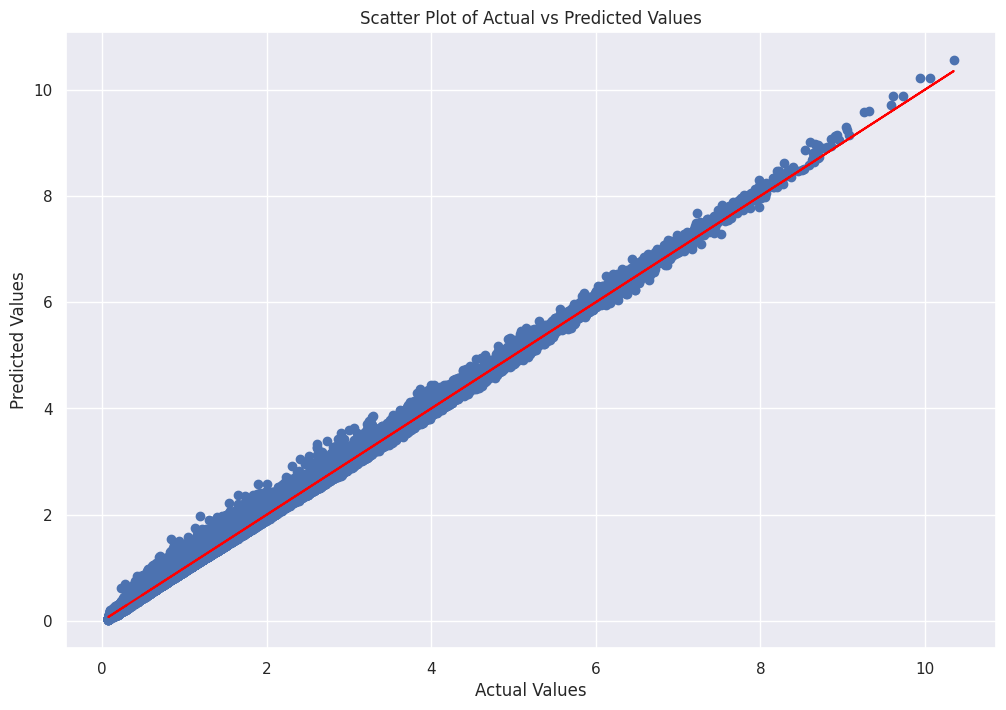

In [13]:

reg = LinearRegression()
reg.fit(X_train, Y_train)
reg = reg  # Store the regression model in the 'reg' attribute
pred = reg.predict(X_test)
mae = round(skm.mean_absolute_error(Y_test, pred), 2)
rmse = round(skm.mean_squared_error(Y_test, pred, squared=False), 2)
r2_score = round(skm.r2_score(Y_test, pred), 4)
ev = round(skm.explained_variance_score(Y_test, pred), 4)

 
# Scatter plot
plt.scatter(Y_test, pred)
plt.plot(Y_test, Y_test, color='red')  # Add the prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

In [14]:
print(mae, rmse, r2_score, ev)

0.03 0.04 0.9985 0.9985


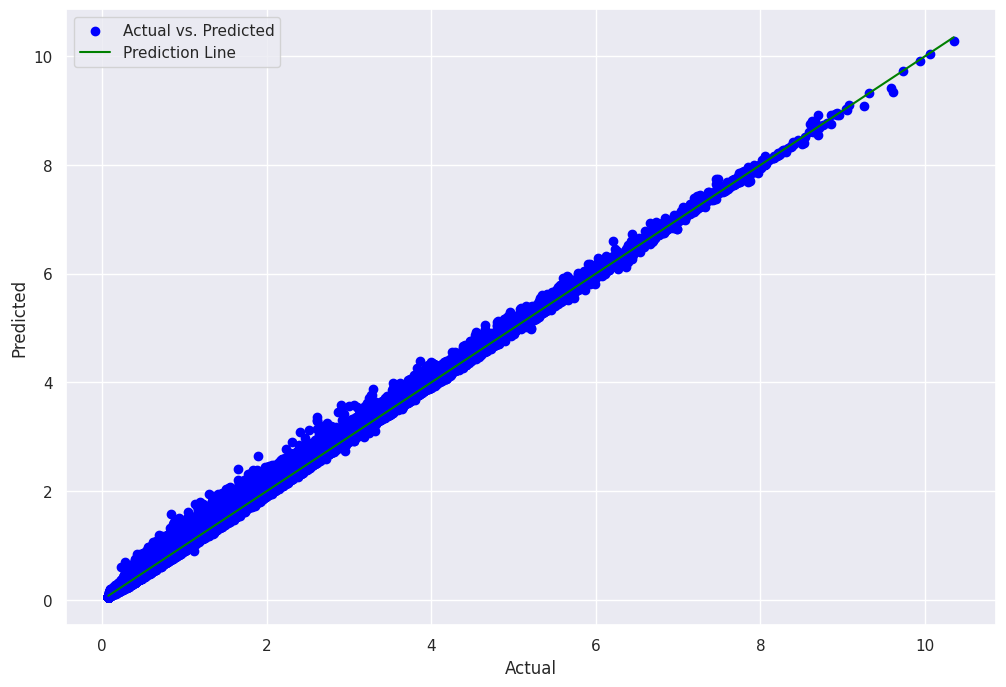

In [15]:

reg = LinearRegression()
pol_feat = PolynomialFeatures(4)########
X_train_transf = pol_feat.fit_transform(X_train)
X_test_transf = pol_feat.fit_transform(X_test)
model = reg.fit(X_train_transf, Y_train)
pred = model.predict(X_test_transf)
mae = round(skm.mean_absolute_error(Y_test, pred), 2)
rmse = round(skm.mean_squared_error(Y_test, pred, squared=False), 2)
r2_score = round(skm.r2_score(Y_test, pred), 4)
ev = round(skm.explained_variance_score(Y_test, pred), 4)

# Scatter plot for actual and predicted values
plt.scatter(Y_test, pred, color='blue', label='Actual vs. Predicted')

# Scatter plot for training data
# plt.scatter(Y_train, model.predict(pol_feat.fit_transform(X_train)), color='red', label='Training Data')

# Prediction line
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='green', label='Prediction Line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()




In [16]:
print(mae, rmse, r2_score, ev)

0.02 0.03 0.999 0.999


#                                                Алгоритмы кластеризации данных

##### Произвести масштабирование признаков (scaling).
##### С использованием библиотеки scikit-learn написать программу с использованием алгоритмов кластеризации данных, позволяющую разделить исходную выборку на классы, соответствующие предложенной вариантом задаче (http://scikit-learn.org/stable/modules/clustering.html).
##### Провести эксперименты и определить наилучший алгоритм кластеризации, параметры алгоритма. Необходимо использовать не менее 3-х алгоритмов. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [17]:
# Importando os pacotes
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
%matplotlib inline

In [18]:
dataset = df_filtered

In [19]:
## delete data and time
dataset = dataset.iloc[0:, 2:9].dropna() 

<Axes: >

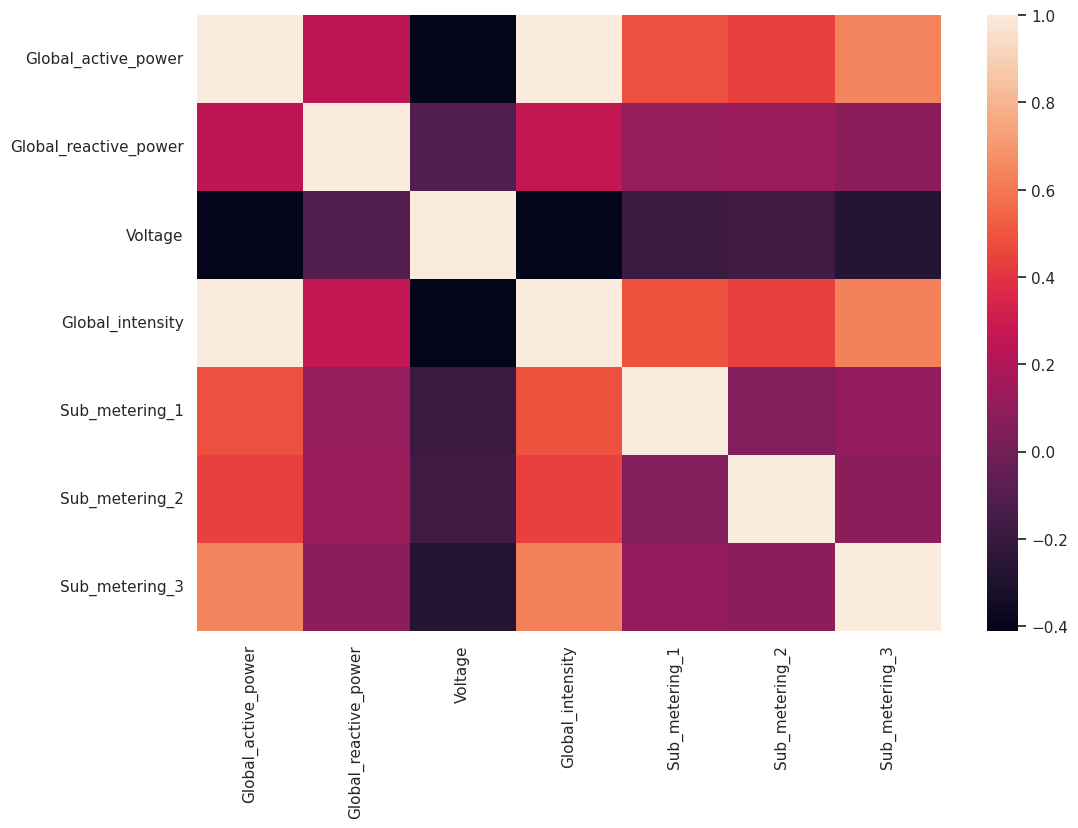

In [20]:
sns.heatmap(dataset .corr())

In [21]:
dataset.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [22]:
##Randomize dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [23]:
# Calculate the index to split the dataset
split_index = int(len(dataset) * 0.01)

# Split the dataset into exmp1 and exmp2
exmp1 = dataset[:split_index]
exmp2 = dataset[split_index:]

##### Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. It aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information.

In [24]:
from sklearn.decomposition import PCA
# use principal(major) components alalysis

pca= PCA(n_components= 2).fit_transform(exmp1)

##### define range of k

In [25]:

k_range = range(1, 12)

## Apply kmeans model.
##### In short terms, a k-means model is a clustering algorithm used in machine learning. It aims to partition a given dataset into k distinct clusters based on their similarity. The algorithm works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of the assigned points. This process continues until convergence, where the centroids no longer change significantly or a maximum number of iterations is reached. 

In [57]:
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]


## Apply MiniBatchKMeans

##### MiniBatchKMeans is a clustering algorithm that is a variation of the K-means algorithm. It is designed to handle large datasets more efficiently by using mini-batches of data instead of the entire dataset during each iteration.

In [ ]:
k_means_var_mini = [MiniBatchKMeans(n_clusters = k).fit(pca) for k in k_range]

## Apply AgglomerativeClustering

##### AgglomerativeClustering is a hierarchical clustering algorithm that recursively merges similar clusters to form a hierarchy of clusters. It starts with each data point as a separate cluster and then iteratively merges the closest pairs of clusters until a stopping criterion is met.

In [ ]:
agglomerative_var = [AgglomerativeClustering(n_clusters = k).fit(pca) for k in k_range]

##### create list with centroids

In [66]:
centroids = [X.cluster_centers_ for X in k_means_var]
centroids_mini = [X.cluster_centers_ for X in k_means_var_mini]
centroids_agglomerative = [X.labels_ for X in agglomerative_var]

##### Calculating the Euclidean distance from each data point to the centroid

In [38]:
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [39]:
k_euclid_mini = [cdist(pca, cent, 'euclidean') for cent in centroids_mini]
dist_mini = [np.min(ke, axis = 1) for ke in k_euclid_mini]

In [ ]:
k_euclid_agglomerative = [cdist(pca, cent, 'euclidean') for cent in centroids_agglomerative]
dist_agglomerative = [np.min(ke, axis = 1) for ke in k_euclid_agglomerative]

##### Sum of the squares of the distances within the cluster

In [40]:
summ_squares_in_cluster = [sum(d**2) for d in dist]
summ_squares_in_cluster_mini = [sum(d**2) for d in dist_mini]
summ_squares_in_cluster_mini = [sum(d**2) for d in dist_agglomerative]

##### Total sum of squares

In [41]:
summ_total = sum(pdist(pca)**2)/pca.shape[0]

In [42]:
# Sum of squares between clusters
summ_squares_between_cluster = summ_total - summ_squares_in_cluster
summ_squares_between_cluster_mini = summ_total - summ_squares_in_cluster_mini
summ_squares_between_cluster_agglomerative = summ_total - summ_squares_in_cluster_mini

## Elbow method
##### обучает модель кластеризации для ряда значений K и визуализирует оценку искажения для каждого из них. Точка перегиба на кривой — известная как локоть — является показателем оптимального значения для K.

## KMeans

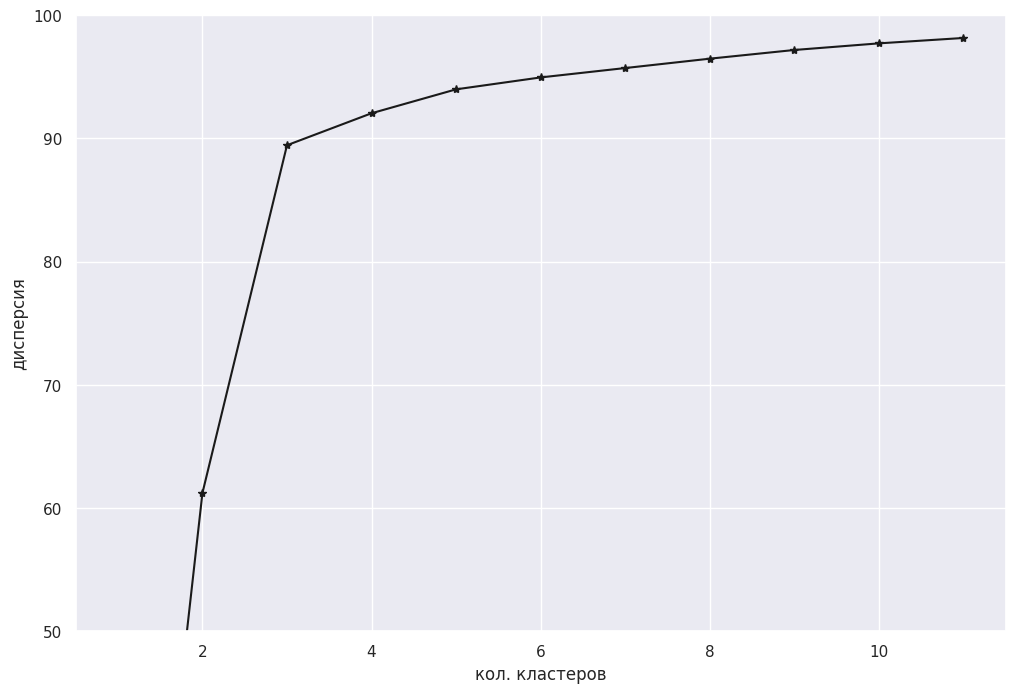

In [56]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, summ_squares_between_cluster/summ_total * 100, "k*-")
ax.set_ylim((50, 100))
ax.grid(True)
plt.xlabel("кол. кластеров")
plt.ylabel("дисперсия")
plt.show()

## MiniBatchKMeans

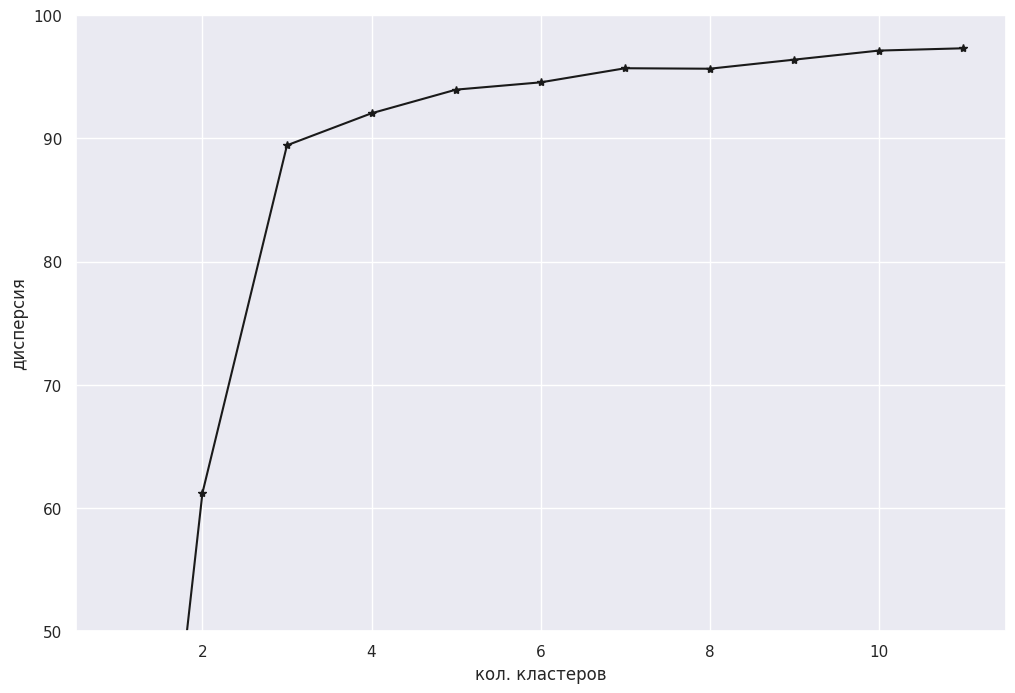

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, summ_squares_between_cluster_mini/summ_total * 100, "k*-")
ax.set_ylim((50, 100))
ax.grid(True)
plt.xlabel("кол. кластеров")
plt.ylabel("дисперсия")
plt.show()

#####  define model with K = 3

In [ ]:

model_k3 = KMeans(n_clusters= 3)
model_k5 = KMeans(n_clusters= 5)
model_k7 = KMeans(n_clusters= 7)
model_k9 = KMeans(n_clusters= 9)
model_k3.fit(pca)
model_k5.fit(pca)
model_k7.fit(pca)
model_k9.fit(pca)

KMeans(n_clusters=9)

## Voronoi Diagram

#####  Диаграмма Вороного конечного множества точек S на плоскости представляет такое разбиение плоскости, при котором каждая область этого разбиения образует множество точек, более близких к одному из элементов множества S, чем к любому другому элементу множества.

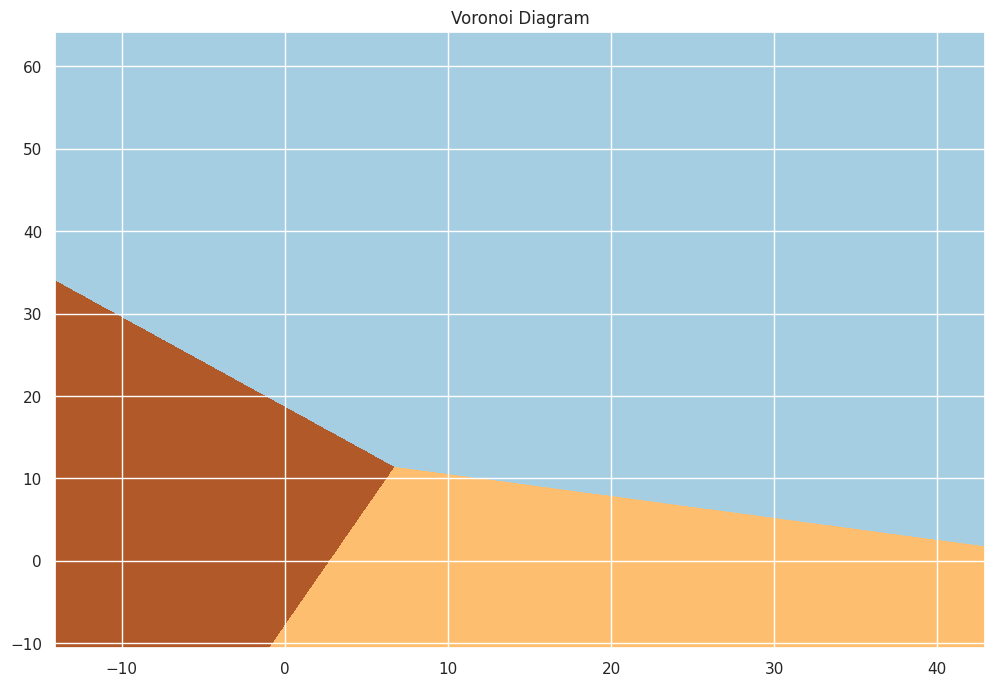

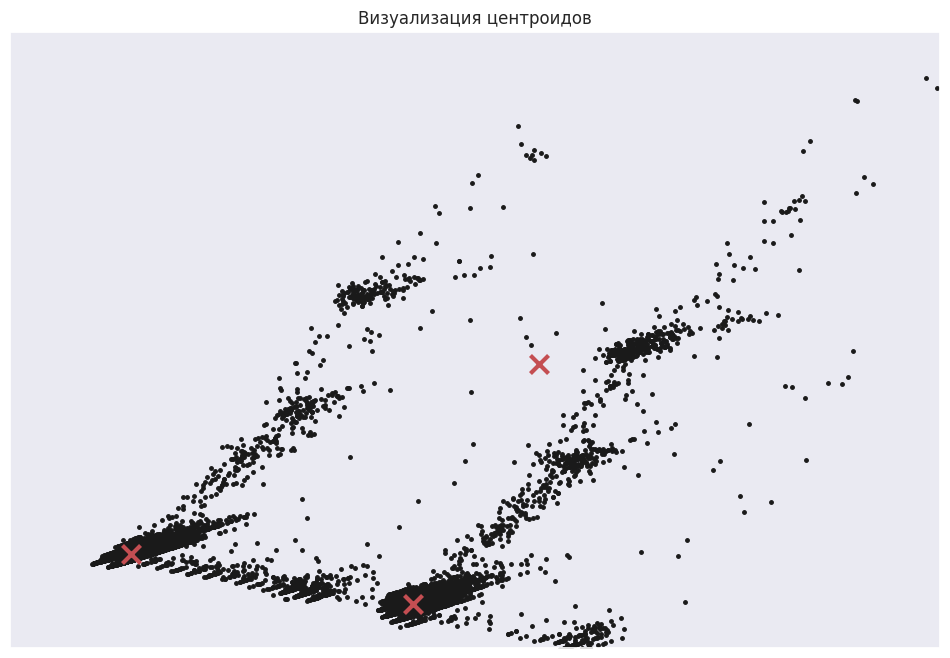

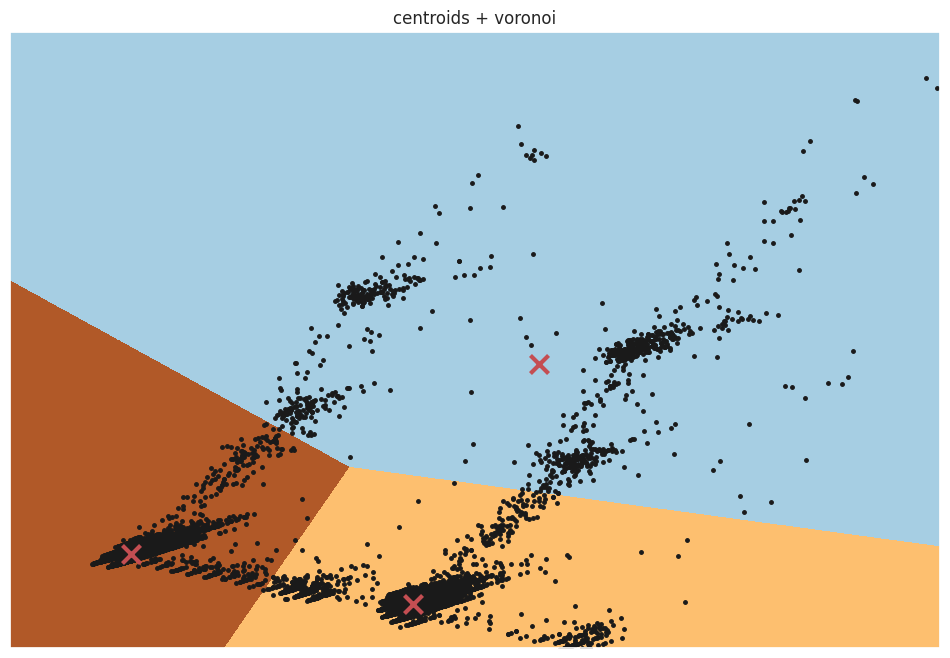

In [ ]:
def best_k(model_with_k):
    ####### find min and max values
    x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
    y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .02))
    Z = model_with_k.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ## Voronoi Diagram
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, 
            interpolation = 'nearest',
            extent = (xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Paired,
            aspect = 'auto', 
            origin = 'lower', )
    plt.title("Voronoi Diagram")
    plt.show()

    # Showing centroids on graph (without voronoi) 
    plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 5)
    centroids = model_with_k.cluster_centers_
    inert = model_with_k.inertia_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title("Визуализация центроидов")
    plt.show()

    # centroids + voronoi
    plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 5)
    centroids = model_with_k.cluster_centers_
    inert = model_with_k.inertia_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title("centroids + voronoi")
    plt.imshow(Z, 
            interpolation = 'nearest',
            extent = (xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Paired,
            aspect = 'auto', 
            origin = 'lower', )
    plt.show()
best_k(model_k3)

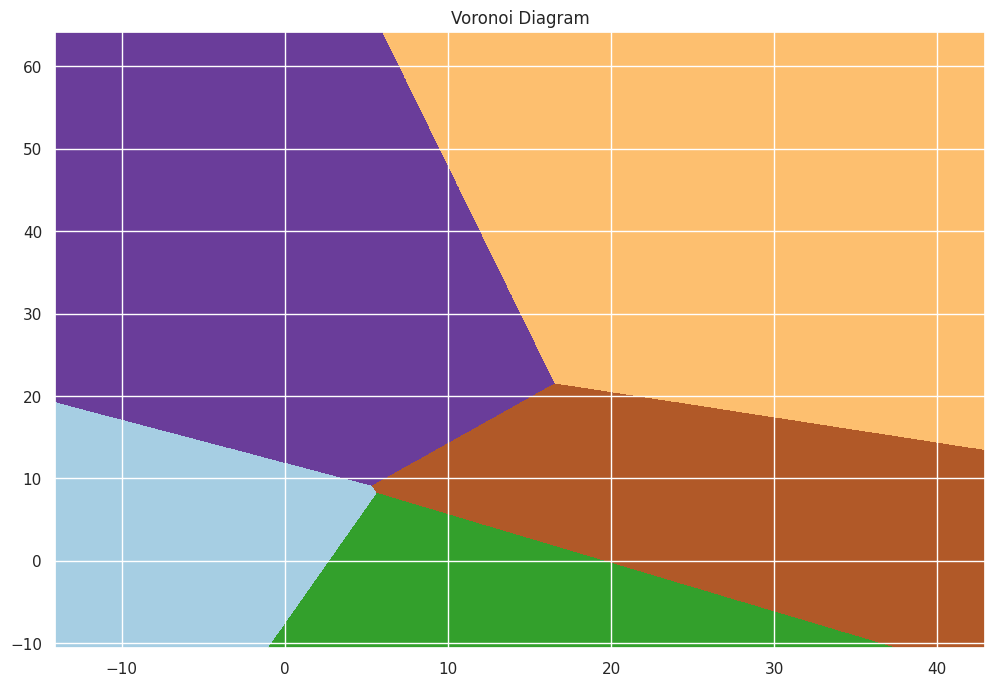

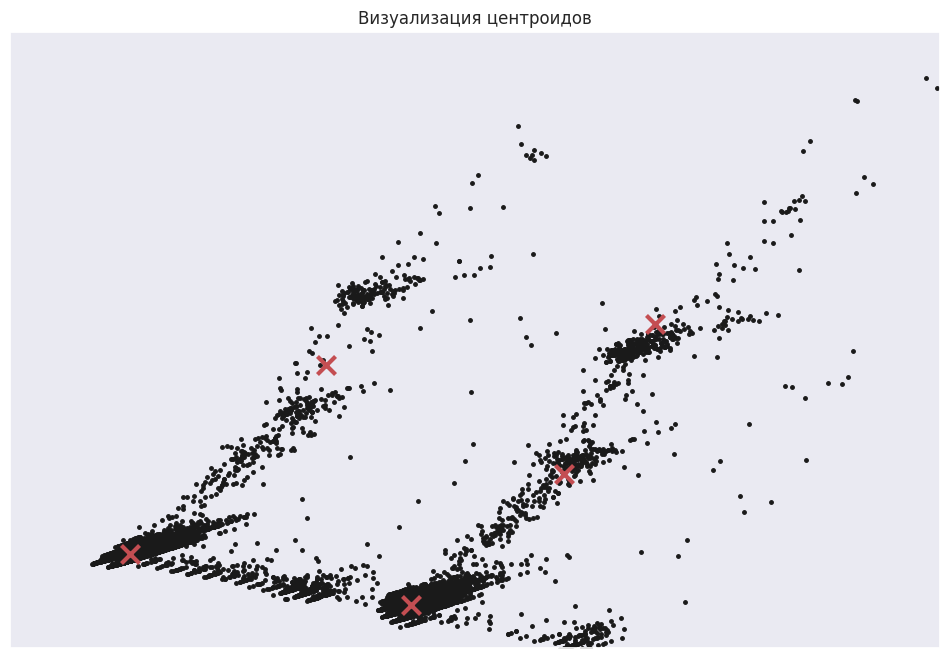

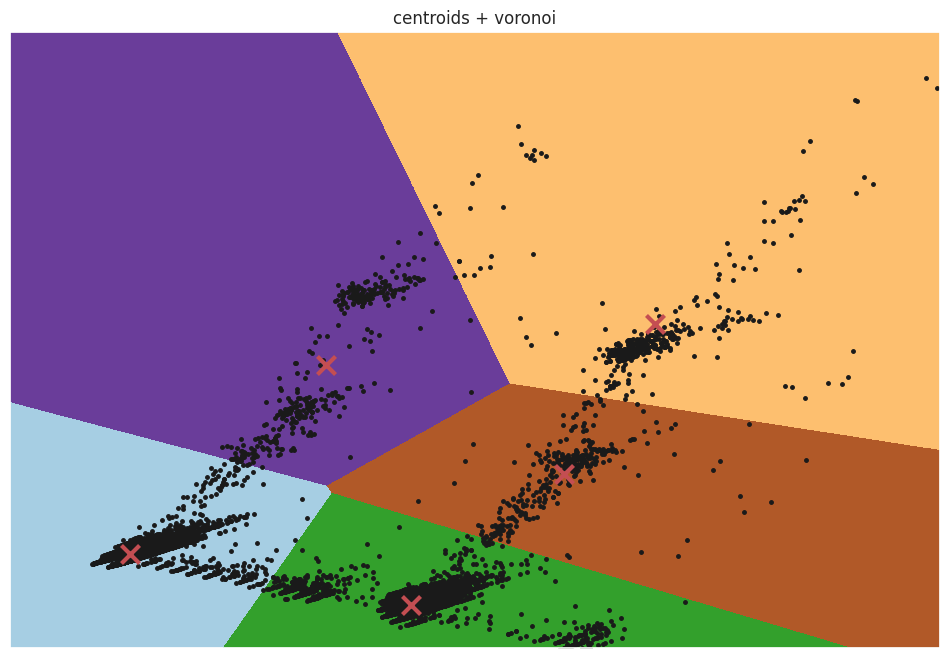

In [ ]:
best_k(model_k5)

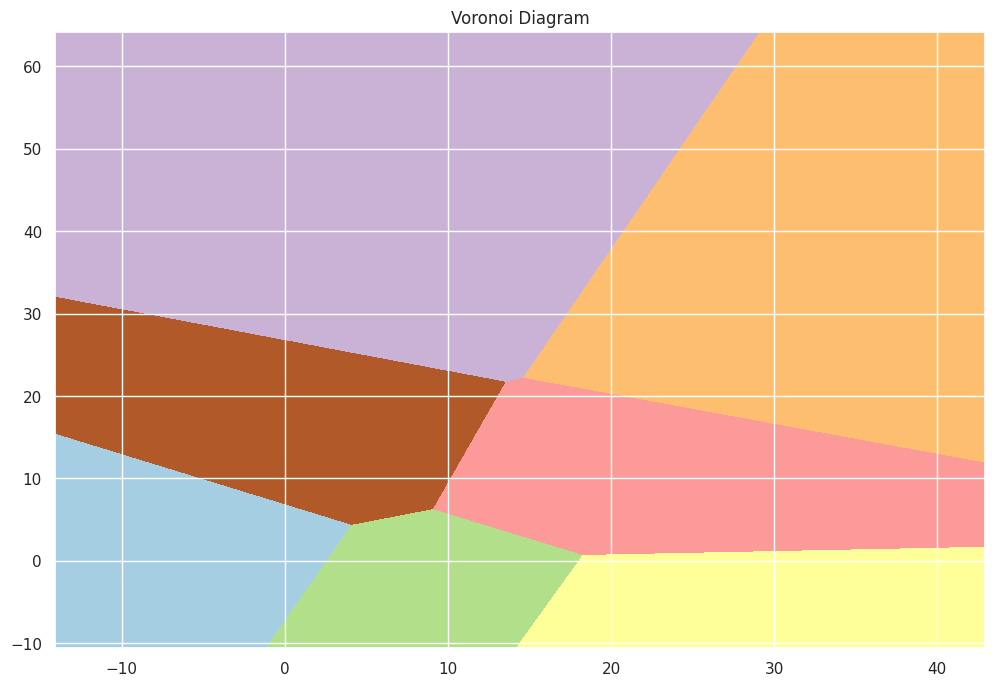

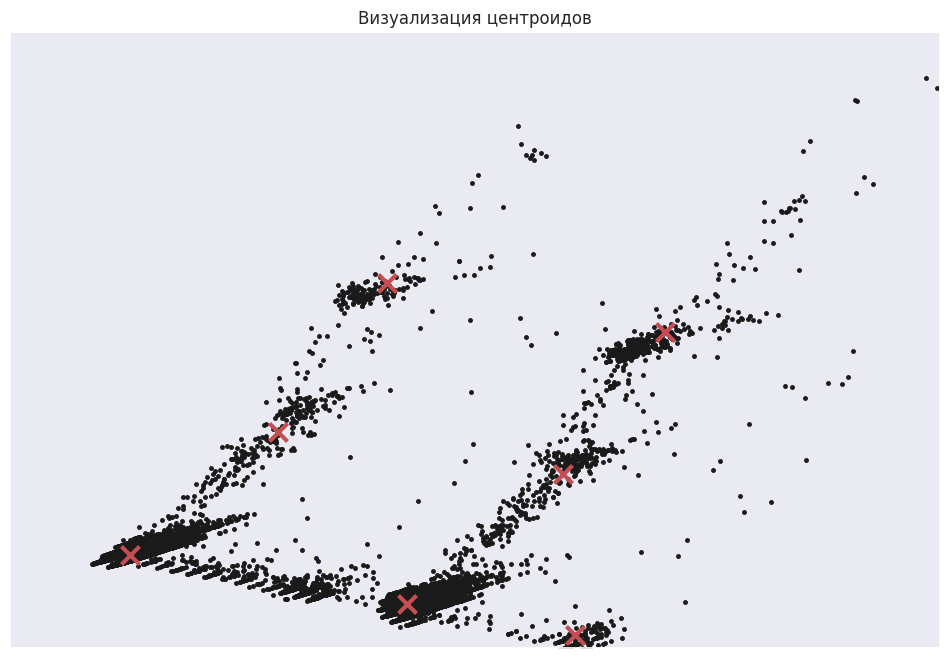

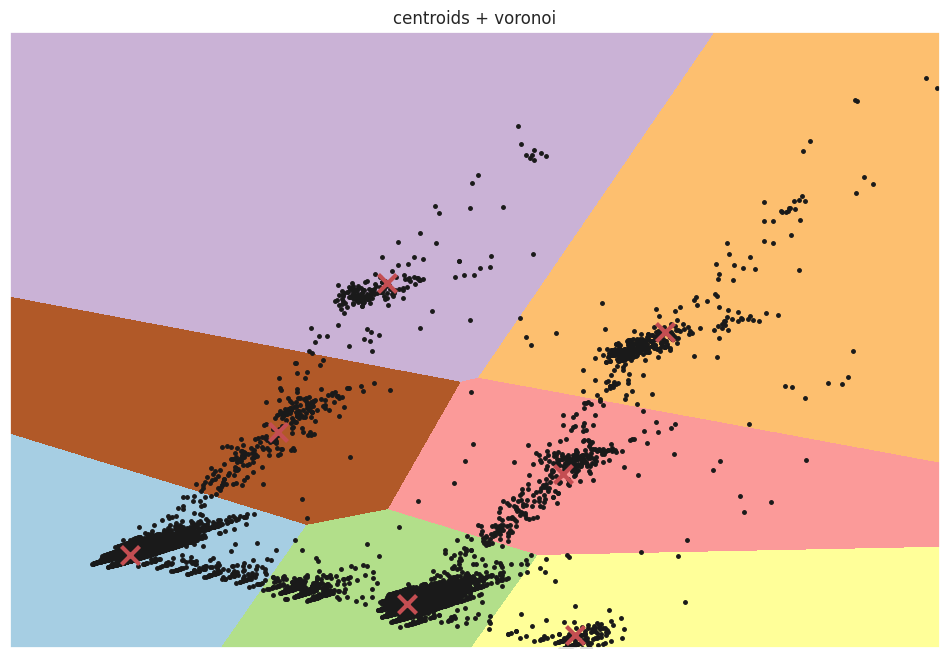

In [ ]:
best_k(model_k7)

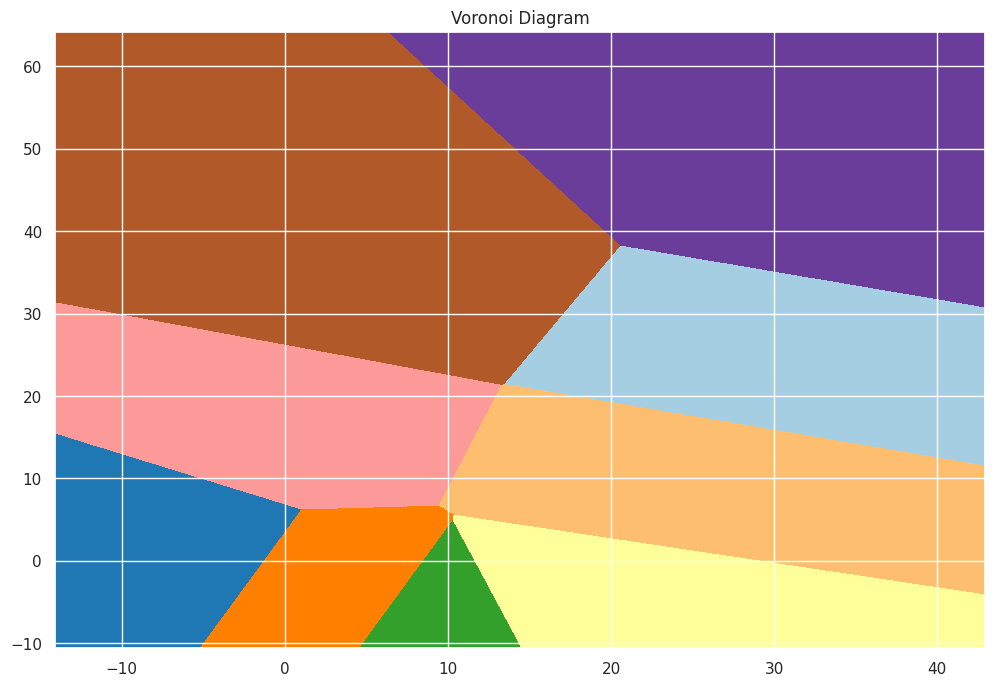

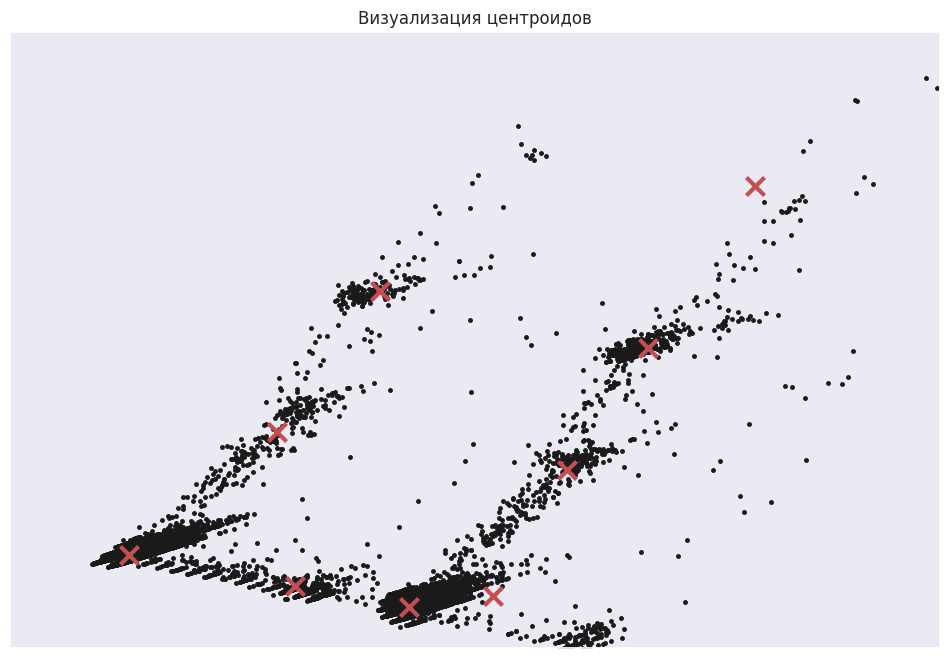

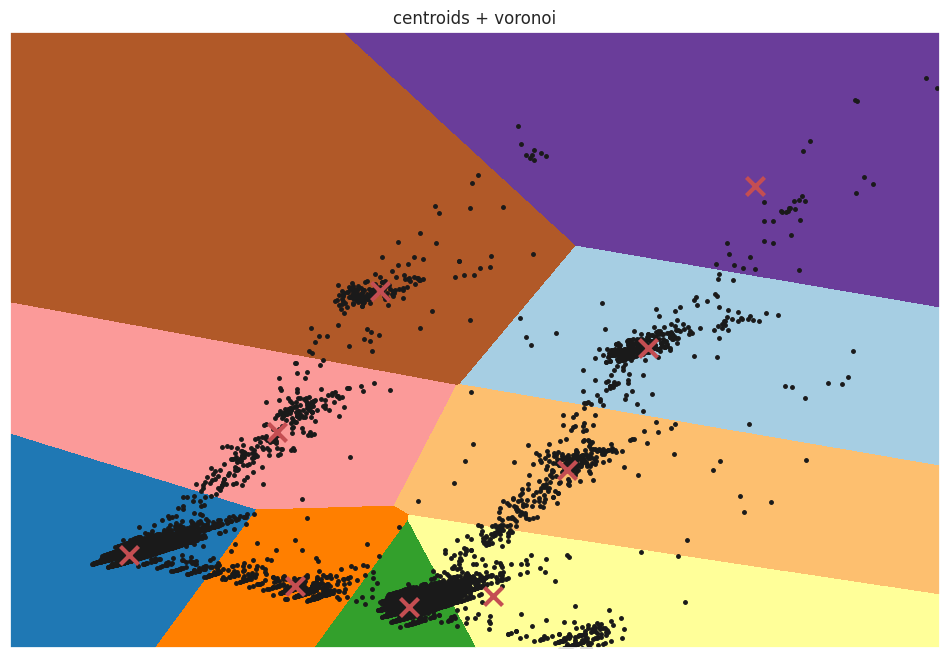

In [ ]:
best_k(model_k9)

## MiniBatchKMeans

In [51]:
model_k3_mini = MiniBatchKMeans(n_clusters=5)
model_Aggl = AgglomerativeClustering(n_clusters=5)


centroids, k_euclid, dist, summ_squares_between_cluster, 

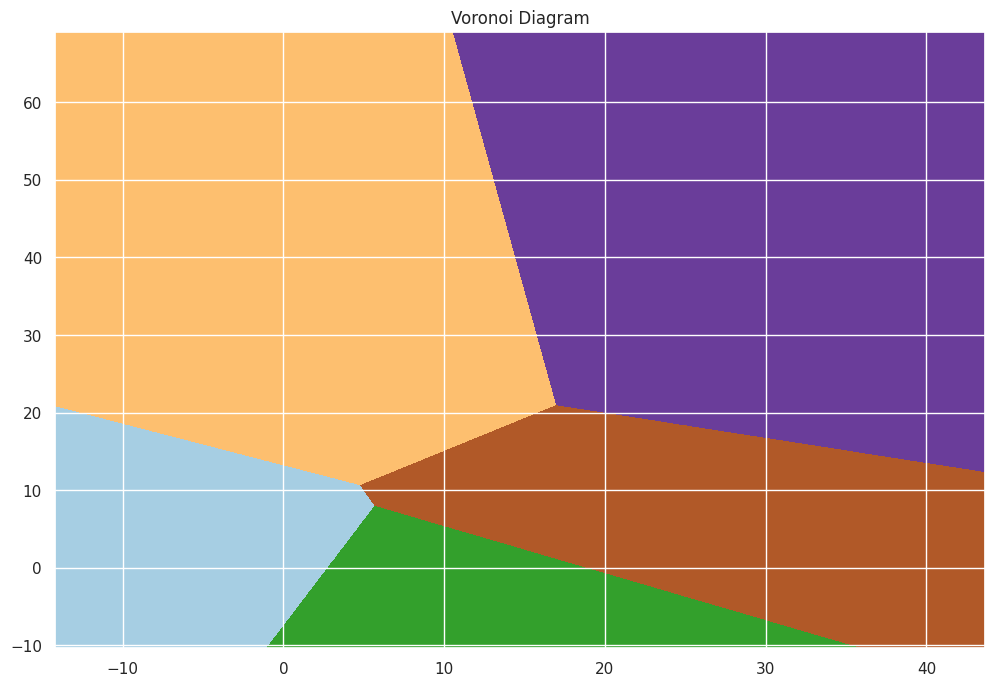

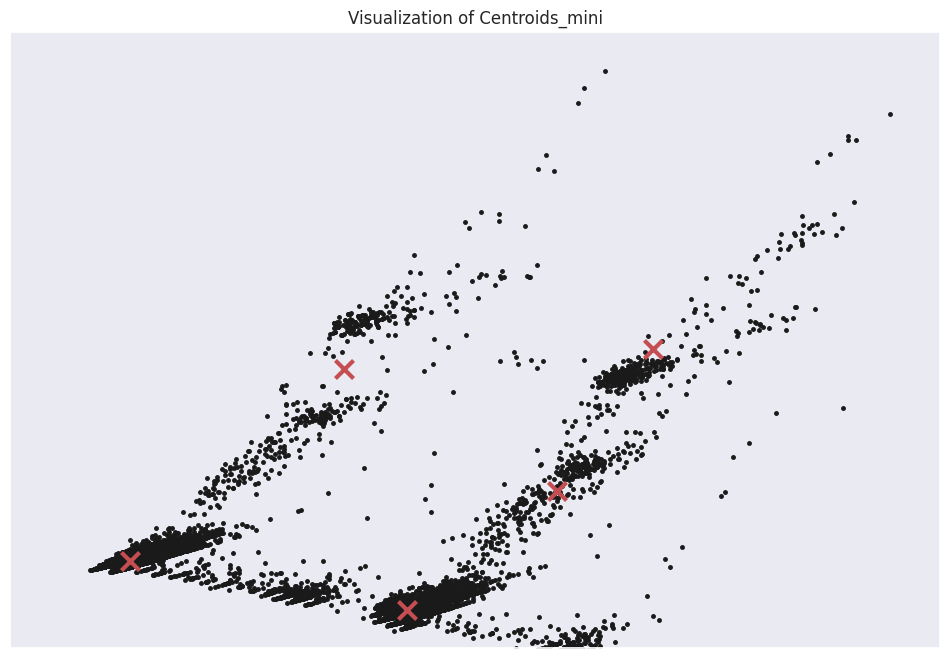

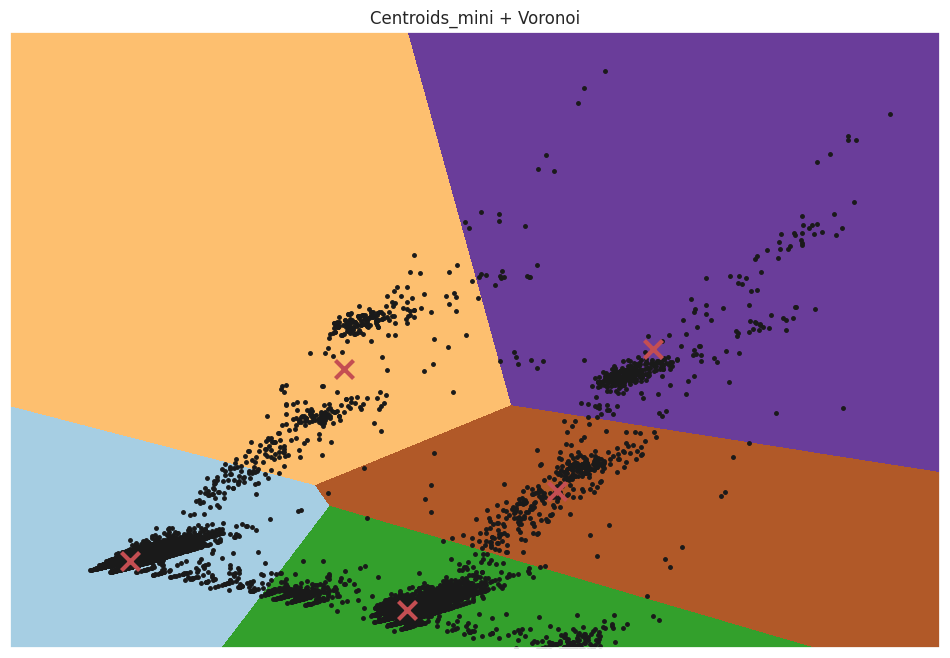

In [52]:
def best_k(model_with_k):
    # Find min and max values
    x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
    y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
    
    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .02))
    
    # Predict clusters using MiniBatchKMeans
    model_with_k.fit(pca)
    Z = model_with_k.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Voronoi Diagram
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
    plt.title("Voronoi Diagram")
    plt.show()
    
    # Showing centroids_mini on graph (without voronoi)
    plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize=5)
    centroids_mini = model_with_k.cluster_centers_
    inert = model_with_k.inertia_
    plt.scatter(centroids_mini[:, 0], centroids_mini[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title("Visualization of Centroids_mini")
    plt.show()
    
    # Centroids_mini + Voronoi
    plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize=5)
    centroids_mini = model_with_k.cluster_centers_
    inert = model_with_k.inertia_
    plt.scatter(centroids_mini[:, 0], centroids_mini[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title("Centroids_mini + Voronoi")
    plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
    plt.show()

# Call the function with the MiniBatchKMeans model
best_k(model_k3_mini)

In [ ]:
def score_check(model):
    # Silhouette Score
    labels = model.labels_
    return round(silhouette_score(pca, labels, metric = 'euclidean'),3)

print(
score_check(model_k3),
score_check(model_k5),
score_check(model_k7),
score_check(model_k9))

0.852 0.858 0.843 0.786


In [105]:
df_filtered.shape

(2049280, 9)

In [112]:
db_final = dataset[:1000].sample(frac = 0.3)
db_final.shape

(300, 7)

In [113]:
db_final

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
435,0.182,0.000,241.04,0.8,0.0,0.0,0.0
160,0.654,0.114,245.01,2.6,0.0,0.0,1.0
521,0.710,0.054,246.06,2.8,0.0,0.0,0.0
647,0.334,0.100,248.93,1.4,0.0,1.0,0.0
267,0.240,0.000,244.19,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
539,1.306,0.124,241.41,5.4,0.0,0.0,18.0
115,0.230,0.122,241.96,1.0,0.0,2.0,0.0
611,0.734,0.140,240.86,3.2,0.0,2.0,1.0
910,0.276,0.000,235.66,1.2,0.0,0.0,0.0


## dendrograms


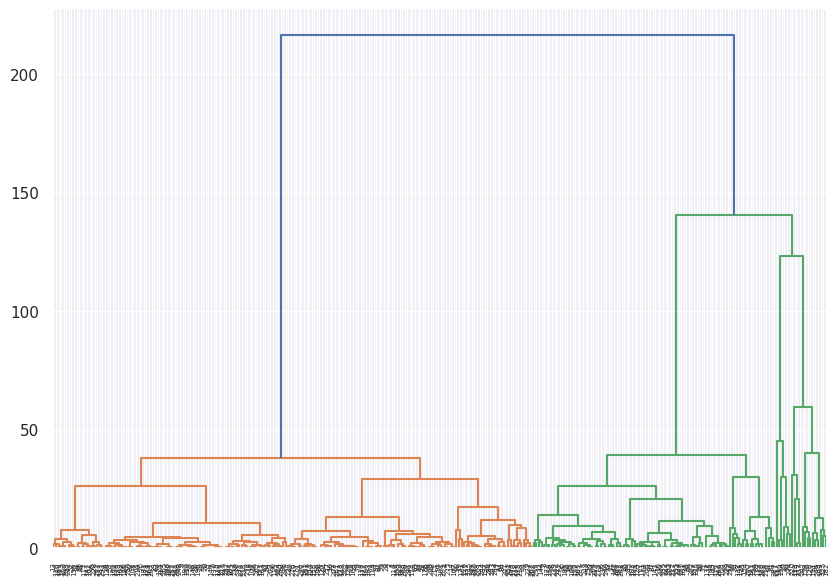

In [114]:
fig = plt.figure(figsize = (10, 7))

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(db_final, method = 'ward'))

In [ ]:
import seaborn as sns

In [149]:
x = dataset[:20000][['Voltage', 'Global_intensity']].values

In [150]:
# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(x)

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


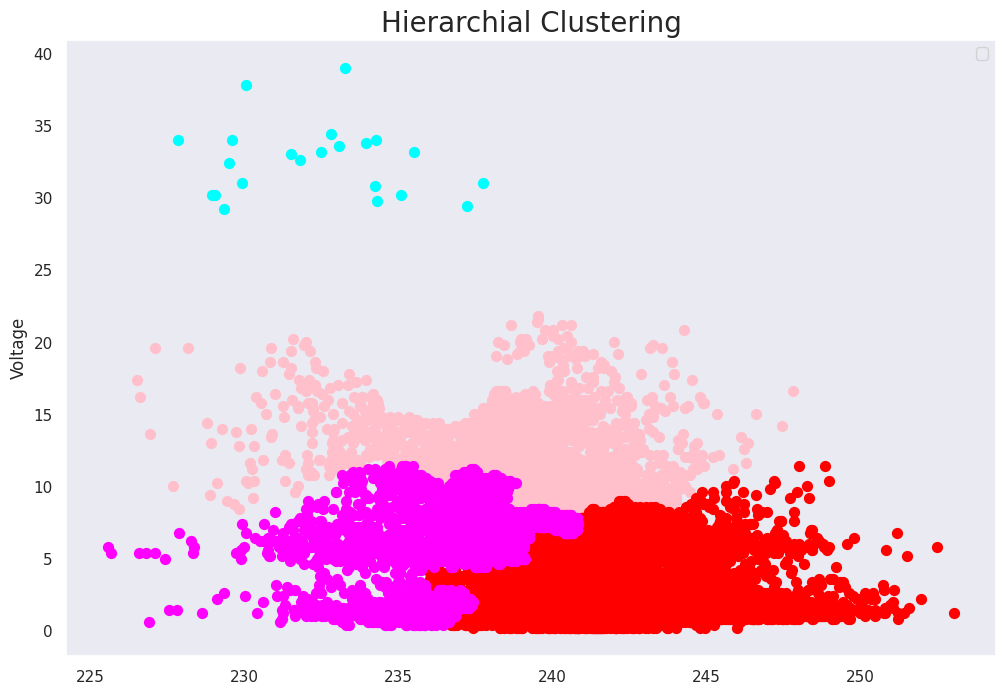

In [148]:


plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
# plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
# plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
# plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
# plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
# plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')

# plt.ylim(200, 250)
# plt.xlim(0, 8)

plt.title('Hierarchial Clustering', fontsize = 20)

plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.show()


In [3]:
import pandas as pd
dataset = pd.read_csv('household_power_consumption.csv')

In [38]:
# -*- coding: utf-8 -*- 
#Необходимые импорты 
from sklearn.linear_model import Perceptron 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPClassifier 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import numpy as np
import random
#функция расчета медианы 
def median(lst): 
 return np.median(np.array(lst)) 

In [313]:

Power_consumption = pd.read_csv('household_power_consumption.csv'
            , delimiter=',')
mask = pd.to_numeric(Power_consumption['Global_active_power'], errors='coerce').isna()
df_filtered = Power_consumption[~mask]

In [314]:
df_filtered = df_filtered[df_filtered['Global_active_power'] > 1]
# df_filtered = df_filtered[df_filtered['Global_active_power'] < 1.1]

In [301]:
# df_filtered = df_filtered[df_filtered['Global_active_power'] > 1]
# df_filtered = df_filtered[df_filtered['Global_active_power'] < 2]

In [326]:
df_filtered= df_filtered[1000:50000]

In [223]:
# df_filtered = df_filtered[df_filtered['Global_intensity'] > 20]

In [327]:
df_filtered

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1180,17/12/2006,13:04:00,1.742,0.356,238.91,7.4,0.0,0.0,17.0
1181,17/12/2006,13:05:00,1.750,0.358,239.53,7.4,0.0,0.0,18.0
1182,17/12/2006,13:06:00,1.736,0.354,238.56,7.4,0.0,0.0,17.0
1183,17/12/2006,13:07:00,1.712,0.344,236.85,7.2,0.0,0.0,17.0
1184,17/12/2006,13:08:00,1.566,0.246,237.24,6.6,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...
80931,10/2/2007,22:21:00,4.636,0.000,237.00,19.4,1.0,0.0,18.0
80932,10/2/2007,22:22:00,5.758,0.000,236.51,24.6,16.0,0.0,17.0
80933,10/2/2007,22:23:00,6.682,0.054,235.51,28.2,37.0,0.0,17.0
80934,10/2/2007,22:24:00,6.602,0.052,236.12,27.8,37.0,0.0,17.0


In [328]:
cat = ['Date', 'Time']
X = df_filtered.drop(cat + ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1).values
Y = df_filtered['Global_active_power'].values.reshape(-1,1)
# Define a threshold value
threshold = 2

# Convert labels into binary format based on the threshold
Y = np.where(Y >= threshold, 1, 0)

indices = np.arange(X.shape[0])
np.random.seed(2)
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = Y[train_indices], Y[test_indices]

In [329]:
y_train[0:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [330]:
X_train

array([[0.0000e+00, 2.4074e+02, 9.6000e+00],
       [1.1400e-01, 2.3673e+02, 1.4200e+01],
       [0.0000e+00, 2.3969e+02, 5.2000e+00],
       ...,
       [9.6000e-02, 2.3732e+02, 1.5800e+01],
       [1.1600e-01, 2.4423e+02, 5.8000e+00],
       [1.5000e-01, 2.4096e+02, 1.0000e+01]])

In [331]:
X_train

array([[0.0000e+00, 2.4074e+02, 9.6000e+00],
       [1.1400e-01, 2.3673e+02, 1.4200e+01],
       [0.0000e+00, 2.3969e+02, 5.2000e+00],
       ...,
       [9.6000e-02, 2.3732e+02, 1.5800e+01],
       [1.1600e-01, 2.4423e+02, 5.8000e+00],
       [1.5000e-01, 2.4096e+02, 1.0000e+01]])

In [4]:
# # Calculate the index to split the dataset

# split_index = int(len(dataset) * 0.01)

# # Split the dataset into exmp1 and exmp2
# exmp1 = dataset[:split_index]
# exmp2 = dataset[split_index:]

In [332]:
rs = np.linspace(0,10,num=10)
acc_p = [] 
acc_pn = [] 
acc_mlp = [] 
acc_mlpn = [] 

eta_random = random.choice(np.linspace(0.0001, 0.1, 20))
tol_random = random.choice(np.linspace(0.0001, 0.1, 20))
alpha_random = random.choice(np.linspace(0.0001, 0.1, 20))

max_iter_random = random.choice(np.linspace(200, 2000, 20).astype(int))
penalty_random = random.choice(['l2', 'l1', 'elasticnet'])
solver_random = random.choice(['lbfgs', 'sgd', 'adam'])
activation_random = random.choice(['relu', 'identity', 'logistic', 'tanh'])

print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')
#Цикл прогона моделей 
for i in rs: 
    i = int(i) 
    #Распечатка номера итерации 
    print ("Random: ", i )
    #Создание модели персептрона 
    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random)  ###########################################
    #Обучение модели 
    clf.fit(X_train, y_train) 
    #Получение прогноза 
    predictions = clf.predict(X_test) 
    # Расчет показателя accuracy 
    acc = accuracy_score(y_test, predictions) 
    #Распечатка результата 
    print ("Perceptron: ", acc )
    #Добавление оценки в список оценок для модели персептрона 
    acc_p.append(acc) 
    #Нормализация данных 
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 
    #Работа пресептрона с нормализованными данными 
    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random) ###########################################
    clf.fit(X_train_scaled, y_train) 
    predictions = clf.predict(X_test_scaled) 
    acc = accuracy_score(y_test, predictions) 
    print ("Perceptron with normalization: ", acc )
    acc_pn.append(acc) 
    #Создание многослойного классификатора 
    mlp = MLPClassifier(random_state=i, solver=solver_random, activation=activation_random
                        , alpha= alpha_random, tol= tol_random, hidden_layer_sizes=(2, ), max_iter= max_iter_random) ###########################################
    

#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

eta_random:0.07896842105263159, tol_random:0.015873684210526314, alpha_random:0.08422631578947369
max_iter_random:1715, penalty_rando:l1, solver_random:lbfgs, activation_random:relu
Random:  0
Perceptron:  0.9404081632653061


/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron with normalization:  0.8546938775510204
Random:  1
Perceptron:  0.8691836734693877
Perceptron with normalization:  0.8546938775510204
Random:  2
Perceptron:  0.9592857142857143
Perceptron with normalization:  0.5383673469387755
Random:  3
Perceptron:  0.938265306122449
Perceptron with normalization:  0.9608163265306122
Random:  4


/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Perceptron:  0.9058163265306123
Perceptron with normalization:  0.8546938775510204
Random:  5
Perceptron:  0.9289795918367347
Perceptron with normalization:  0.5556122448979591
Random:  6
Perceptron:  0.9310204081632653
Perceptron with normalization:  0.8546938775510204
Random:  7
Perceptron:  0.9705102040816327


/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Perceptron with normalization:  0.8546938775510204
Random:  8
Perceptron:  0.8433673469387755
Perceptron with normalization:  0.8546938775510204
Random:  10
Perceptron:  0.8492857142857143
Perceptron with normalization:  0.8546938775510204


/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/petr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

eta_random:0.07896842105263159, tol_random:0.015873684210526314, alpha_random:0.08422631578947369
max_iter_random:1715, penalty_rando:l1, solver_random:lbfgs, activation_random:relu


/home/petr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP:  0.5383673469387755
MLPwith Norm:  0.9864285714285714
Perceptron:  0.8433673469387755 0.9299999999999999 0.9705102040816327 0.04277307595503929
Perceptron with Norm:  0.5383673469387755 0.8546938775510204 0.9608163265306122 0.13222597220647508
MLP:  0.5383673469387755 0.5383673469387755 0.5383673469387755 0.0
MLP with Norm:  0.9864285714285714 0.9864285714285714 0.9864285714285714 0.0


/home/petr/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


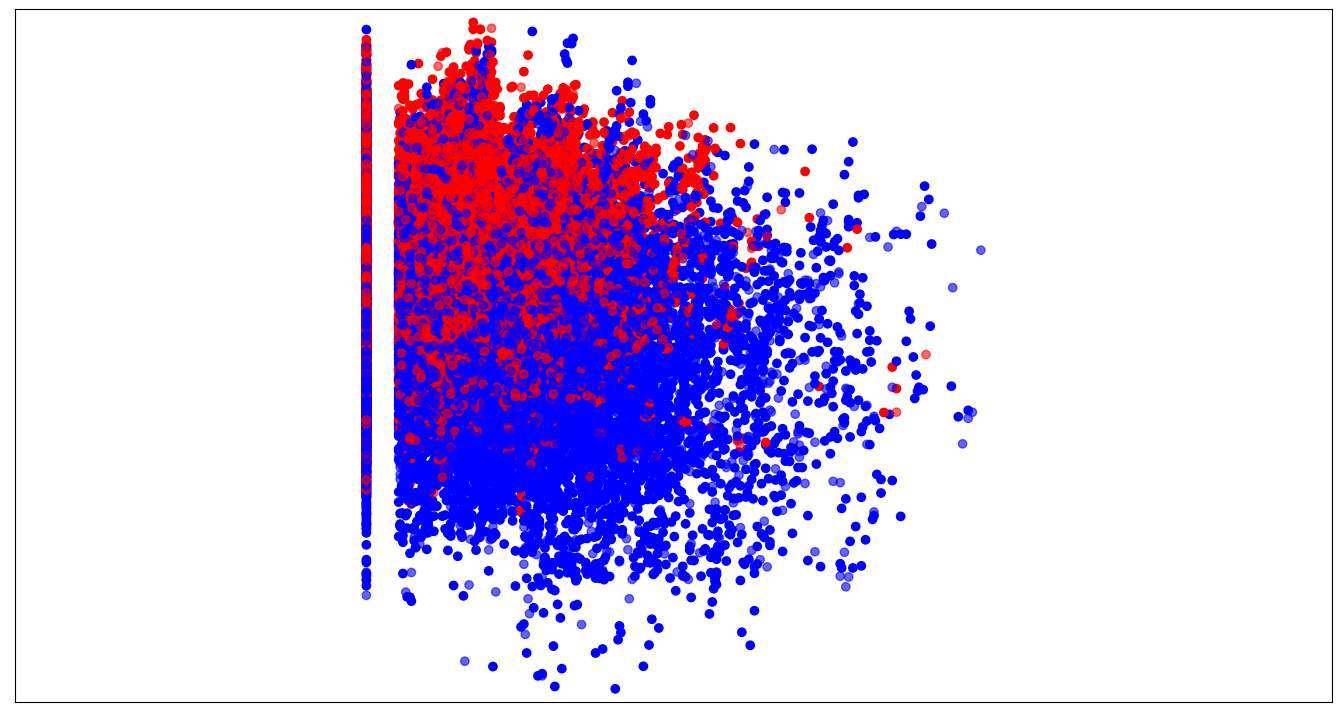

In [333]:
print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')
mlp.fit(X_train, y_train) 
#Работа с ненормализованными данными 
predictions = mlp.predict(X_test) 
acc = accuracy_score(y_test, predictions) 
print ("MLP: ", acc) 
acc_mlp.append(acc) 
#Работа с нормализованными данными 
mlp = MLPClassifier(random_state=i, solver=solver_random, activation=activation_random
                        , alpha= alpha_random, tol= tol_random, hidden_layer_sizes=(2, ), max_iter= max_iter_random) ###############################
mlp.fit(X_train_scaled, y_train) 
predictions = mlp.predict(X_test_scaled) 
acc = accuracy_score(y_test, predictions) 
print ("MLPwith Norm: ", acc) 
acc_mlpn.append(acc) 
#Распечатка итоговых результатов 
print ("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print ("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), 
np.std(acc_pn)) 
print ("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp)) 
print ("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), 
np.std(acc_mlpn)) 
#Расчет минимума и максимума для графика 
X = np.concatenate((X_train, X_test), axis=0) 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
#Построение графика 
figure = plt.figure(figsize=(17, 9)) 
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
ax = plt.subplot(1, 1, 1) 
# Точки из обучающей выборки 
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) 
# Тестовые точки 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6) 
ax.set_xlim(x_min, x_max) 
ax.set_ylim(y_min, y_max) 
ax.set_xticks(()) 
ax.set_yticks(()) 
plt.show() 

In [197]:
df_filtered

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
293,16/12/2006,22:17:00,0.960,0.054,238.68,5.6,0.0,0.0,0.0
298,16/12/2006,22:22:00,0.780,0.090,239.93,4.6,0.0,0.0,0.0
303,16/12/2006,22:27:00,1.388,0.086,240.87,7.2,0.0,0.0,0.0
328,16/12/2006,22:52:00,0.754,0.086,241.27,4.4,0.0,0.0,0.0
329,16/12/2006,22:53:00,1.420,0.178,238.64,7.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:


def read_hpc():
    df_uci = df_filtered
    print(len(df_uci))
    cols_to_use = ['Date', 'Time','Global_active_power']
    cols_to_drop = set(df_filtered.columns) - set(cols_to_use)
    df_uci.drop(cols_to_drop, axis=1, inplace=True)
    df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])
    df_uci = df_uci.drop(['Date','Time'], axis=1)
    df_uci = df_uci.set_index('datetime')
    print(len(df_uci))

 
    df_uci_hourly = df_uci.resample('H').sum()
    df_uci_hourly['hour'] = df_uci_hourly.index.hour
    df_uci_hourly.index = df_uci_hourly.index.date
    print(len(df_uci_hourly))

    df_uci_pivot = df_uci_hourly.pivot(columns='hour')
    df_uci_pivot = df_uci_pivot.dropna()
    print(len(df_uci_pivot))

    return df_uci_pivot

def vis_hpc(data):
    data.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def cluster_vis2(data, data_np, predictions, g):
    predictions_sr = pd.Series(predictions, name='cluster')
    data = data.set_index(predictions_sr, append=True )

    fig, ax= plt.subplots(1,1, figsize=(18,10))
    
    cluster_values = sorted(data.index.get_level_values(1).unique())
    
    color_list = plt.cm.jet(np.linspace(0,1,len(cluster_values)))
    
    if g=='l':
        for cluster, color in zip(cluster_values, color_list):
            data.xs(cluster, level=1).T.plot(
                ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
                )
            data.xs(cluster, level=1).median().plot(
                ax=ax, color=color, alpha=0.9, ls='--'
            )

        ax.set_xticks(np.arange(1,25))
        ax.set_ylabel('kilowatts')
        ax.set_xlabel('hour')
    else:
        tsne = TSNE()
        results_tsne = tsne.fit_transform(data_np)

        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

        plt.scatter(results_tsne[:,0], results_tsne[:,1],
            c=data.index.get_level_values(1),
            cmap=cmap,
            alpha=0.6, 
            )